In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
data = pd.read_csv("Churn1.csv")
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## **Data Preparation Process**

In [ ]:
# removing unnecessary columns
data = data.drop(["customerID"], axis=1)

# label encoding
for column in data.columns:
  if data[column].dtype == object:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Seperating feature and target variables
X = data.drop(["Churn"], axis=1)
y = data["Churn"]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scaling Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## **Creating a Model**

In [ ]:
model = models.Sequential()

# Using the Relu Activation Function, we make negative inputs 0; we can use positive inputs as is.
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))

# We use the sigmoid activation function as a function for probability interpretations,
# limiting the outputs between 0 and 1, allowing the results to be interpreted as probabilities.
model.add(layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Compilation

# loss = "binary-crossentropy" => With this loss function, we are saying that the estimates should be probabilistic, that is, between 0 and 1.

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])



## **Model Training**

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7070 - loss: 0.5739 - val_accuracy: 0.7746 - val_loss: 0.4429
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7734 - loss: 0.4560 - val_accuracy: 0.7862 - val_loss: 0.4299
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7786 - loss: 0.4439 - val_accuracy: 0.7879 - val_loss: 0.4267
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7884 - loss: 0.4468 - val_accuracy: 0.7906 - val_loss: 0.4253
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7959 - loss: 0.4375 - val_accuracy: 0.7933 - val_loss: 0.4214
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8051 - loss: 0.4286 - val_accuracy: 0.7879 - val_loss: 0.4220
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8024 - loss: 0.4214 - val_accuracy: 0.7915 - val_loss: 0.4186
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8155 - loss: 0.4076 - val_accuracy: 0

## **Model Evaluation and Visualization**

In [ ]:
# Model evaluation:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy:{test_acc}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4149
Test accuracy:0.8062455654144287


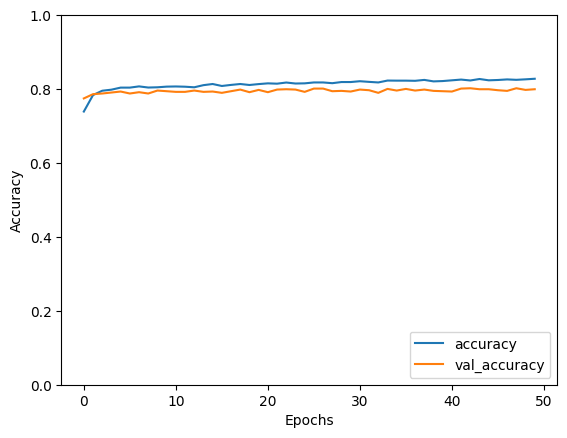

In [ ]:
# Visualization
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,1])
plt.legend(loc="lower right")
plt.show()

**COMMENTS:**

* **Accuracy**: It expresses training accuracy. It shows the success of the model on the training data.

* **Validation_Accuracy:** It expresses validation accuracy. It shows the success of the model on the test set.

* If the accuracy score increases while your validation score decreases, we can say that this is a sign of overfitting.

* If the validation accuracy increases as the training accuracy (val_accuracy) increases, then the model is performing well on both training and test data.

* Here,  as the accuracy value increases, the validation accuracy increases and the model performs well because the values are very close to each other.